Sam_model.ipynb uses the SAM-segment anything model which itself is used to generate masks for all objects in an image.

In [1]:
# Install Segment Anything
pip install git+https://github.com/facebookresearch/segment-anything.git

/bin/bash: /anaconda/envs/azureml_py38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ly64momp
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ly64momp
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
# optional dependencies
pip install opencv-python pycocotools matplotlib onnxruntime onnx

/bin/bash: /anaconda/envs/azureml_py38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [23]:
# importations 
import cv2
import json
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw



In [13]:
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

In [10]:
# model checkpoint 'ViT-L SAM model' is downloaded
sam = sam_model_registry["vit_l"](checkpoint="Users/michael.wehrli/data_hackdays/data/sam_vit_l_0b3195.pth")

In [65]:
# generate masks for an entire image, set the points_per_batch so that the entire mask can be built
mask_generator = SamAutomaticMaskGenerator(sam,points_per_batch = 16)

In [55]:
# in order the large image can be processed
Image.MAX_IMAGE_PIXELS = None

In [62]:
# read in the image
img_big = cv2.imread("Users/florian.sonderegger/data_hackdays/data/Orthofoto_2020_10cm_hackdays.jpg")

In [66]:
# generate the mask
masks_big = mask_generator.generate(img_big)


In [49]:
# function to map the masks on top of the image
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

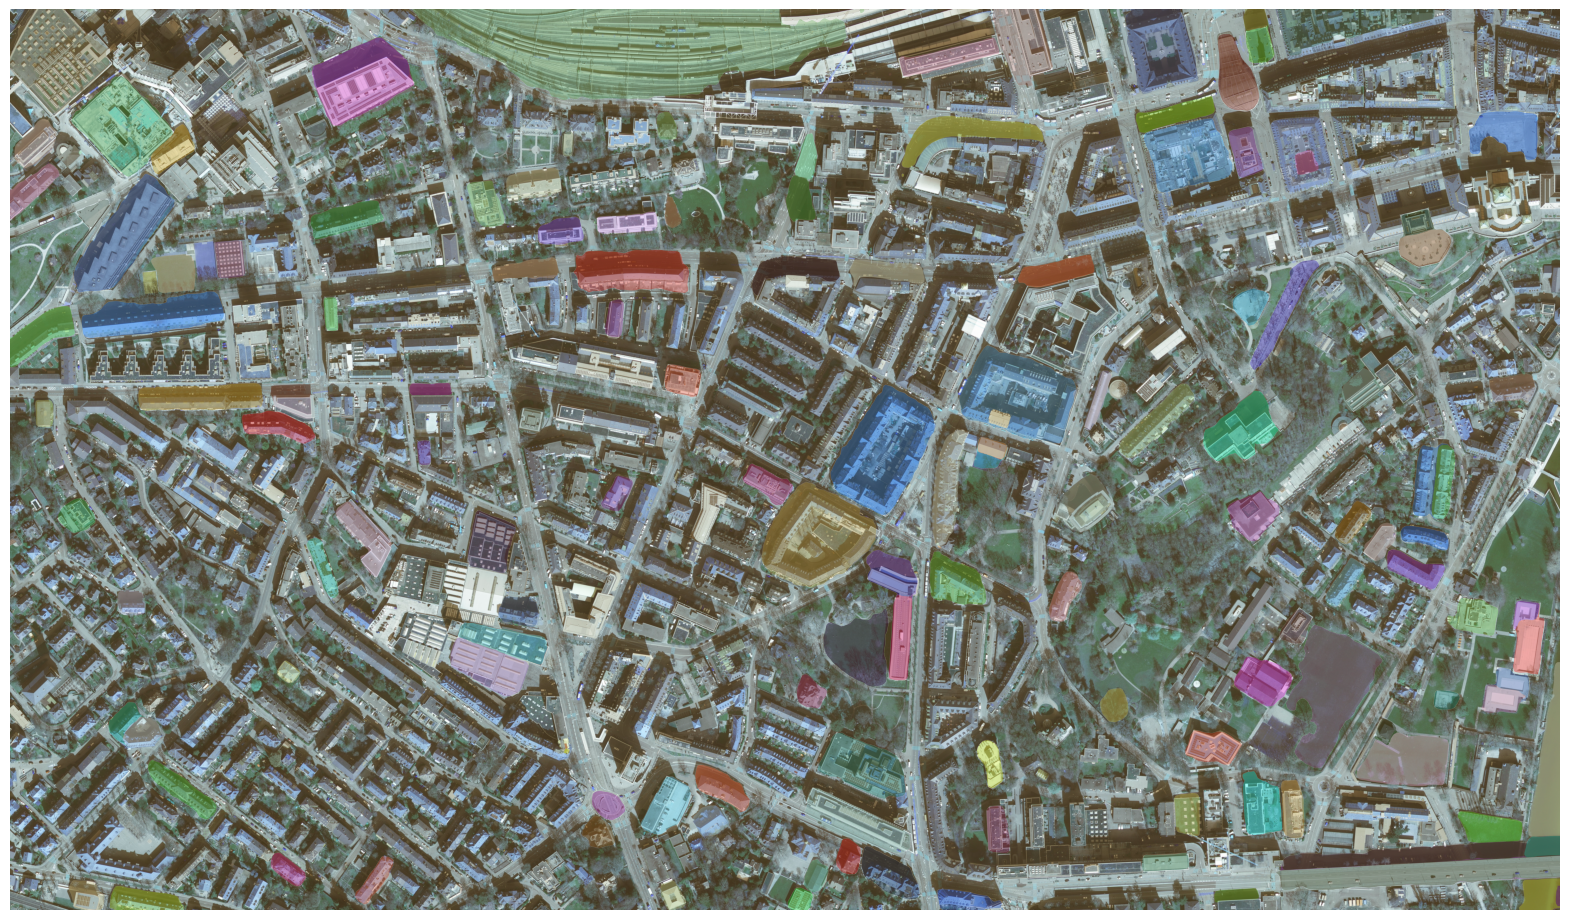

In [67]:
# generate the final plot consisting of the image and its masks
plt.figure(figsize=(20,20))
plt.imshow(img_big)
show_anns(masks_big)
plt.axis('off')
plt.show() 

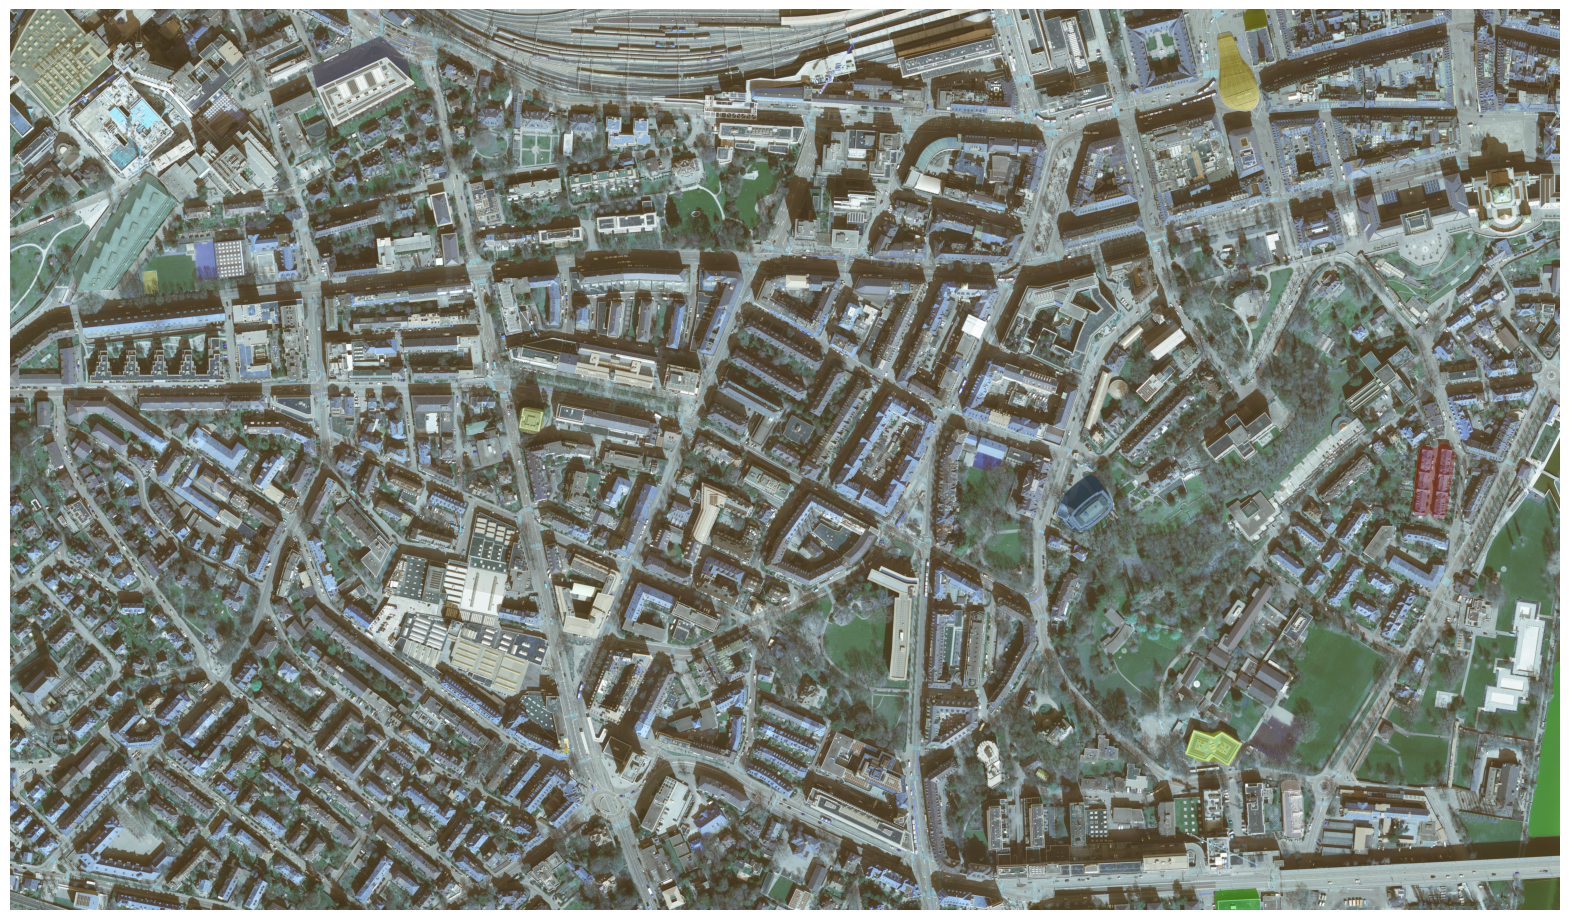

In [81]:
# plot only part of the masks
plt.figure(figsize=(20,20))
plt.imshow(img_big)
show_anns(masks_big[5:18])
plt.axis('off')
plt.show() 